In [2]:
#import opencv2
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the image
img = cv2.imread('2a720e44-dbd8-4080-8ece-d4660033e7b1.jpg', cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread('2a720e44-dbd8-4080-8ece-d4660033e7b1.jpg')


# Calculate Ix and Iy
Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

In [4]:
# Calculate Ixx, Iyy, Ixy
Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix*Iy

In [5]:
# Calculate the matrix M
window_size = 3
offset = window_size//2
height, width = img.shape
k = 0.04
R = np.zeros_like(img, dtype=np.float32)

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+offset+1, x-offset:x+offset+1])
        Syy = np.sum(Iyy[y-offset:y+offset+1, x-offset:x+offset+1])
        Sxy = np.sum(Ixy[y-offset:y+offset+1, x-offset:x+offset+1])
        det = Sxx*Syy - Sxy**2
        trace = Sxx + Syy
        R[y, x] = det - k*(trace**2)

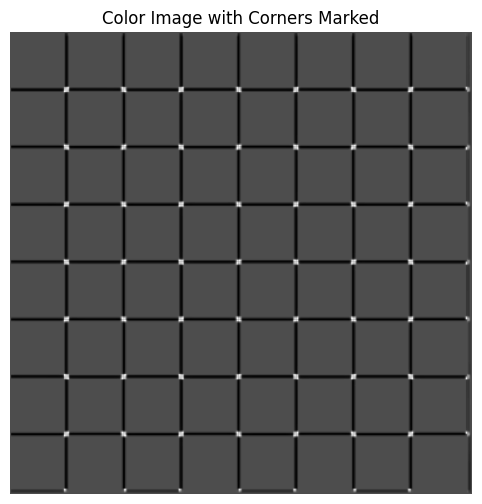

In [12]:
threshold = 0.02 * R.max()

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        value=R[y, x]
        if value>threshold:
            # cornerList.append([x, y, value])
            cv2.circle(color_image,(x,y),4,(255,0,0))

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.imshow(R, cmap='gray')
plt.title('Color Image with Corners Marked')
plt.axis('off')
plt.show()